### 1.2. Naive Bayes

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem. We will focus on an intuitive explanation of how naive Bayes classifiers work, followed by an example of them in action on some datasets.

#### Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities. In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$. Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$ P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})} $$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$ \frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)} $$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label. Such a model is called a generative model because it specifies the hypothetical random process that generates the data. Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

The Naive Bayes algorithm follows the principle that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification. Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these.

Scikit learn (python library) will help us to build a Naive Bayes model in Python. There are three types of Naive Bayes model under the scikit-learn library:

**Gaussian:** It is used in classification and it assumes that features follow a normal distribution.

**Bernoulli:** The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

**Multinomial:** It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.


#### Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*. Imagine that you have the following data:

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

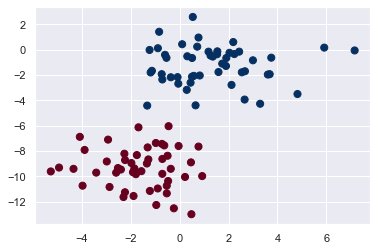

In [29]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution. The result of this naive Gaussian assumption is shown in the following figure:

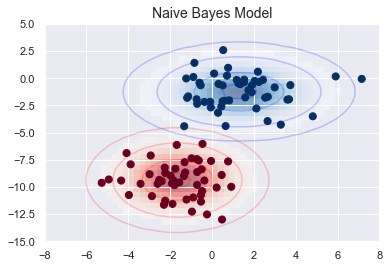

In [160]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses. With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.
This procedure is implemented in Scikit-Learn's sklearn.naive_bayes.GaussianNB estimator:

In [54]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);


Now let's generate some new data and predict the label:

In [55]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is:

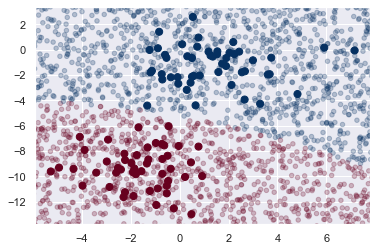

In [56]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.25)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the predict_proba method:

In [10]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

The columns give the posterior probabilities of the first and second label, respectively. If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results. Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

#### Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label. Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution. The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.


The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

**Example** 

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a classification problem. There are 768 observations with 8 input variables and 1 output variable. The variable names are as follows:

1.	Number of times pregnant. 
2.	Plasma glucose concentration after 2 hours in an oral glucose tolerance test. 
3.	Diastolic blood pressure (mm Hg). 
4.	Triceps skinfold thickness (mm). 
5.	2-Hour serum insulin (mu U/ml). 
6.	Body mass index (weight in kg/(height in m)^2). 
7.	Diabetes pedigree function. 
8.	Age (years). 
9.	Class variable (0 or 1). 


In [159]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
df = pd.DataFrame.abs(df)
y = diabetes.target # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

print(y_pred)

(353, 10) (353,)
(89, 10) (89,)
[144. 200.  96. 200.  55.  88.  96.  55.  55.  55.  71.  55. 144.  71.
  88. 144.  71.  55.  71.  96.  88. 200.  88. 144. 150.  71. 144.  77.
 150.  71. 144.  55. 144.  72. 144. 104. 150.  77.  71.  71.  88. 144.
  55.  88.  71.  71.  71.  88.  96. 144.  96. 104.  96.  97.  55.  77.
  71.  59.  96.  90. 144.  90.  55.  90.  55. 200.  96. 200. 281.  96.
  88.  71. 200.  96. 200.  97. 200. 144.  90.  88. 144.  90.  55.  71.
  55. 200.  71.  72.  71.]


#### When to use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model. That said, they have several advantages:

They are extremely fast for both training and prediction  
They provide straightforward probabilistic prediction  
They are often very easily interpretable  
They have very few (if any) tunable parameters  

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification. If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

When the naive assumptions actually match the data (very rare in practice)  
For very well-separated categories, when model complexity is less important  
For very high-dimensional data, when model complexity is less important  

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in every single dimension to be close overall). This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information. For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.